In [28]:
import numpy as np
from math import factorial
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
def combinations(n, k):
    return factorial(n) / (factorial(k) * factorial(n - k))

**1) Даны значения зарплат из выборки выпускников: 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150. Посчитать (желательно без использования статистических методов наподобие std, var, mean) среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий, первый и третий квартили, интерквартильное расстояние. Найти выбросы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.**

In [3]:
salary = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

$$\overline{x} = 65.30$$

In [8]:
salary_mean = sum(salary) / len(salary)
salary_mean

65.3

$$\sigma = \sqrt{\frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n}} = 30.82$$

In [10]:
sigma = np.sqrt(sum((salary - salary_mean ) ** 2) / len(salary))
sigma

30.823854398825596

$$\sigma^2 = \frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n} = 950.11$$

In [11]:
salary_variance = sum((salary - salary_mean ) ** 2) / len(salary)
salary_variance

950.11

$$\sigma^2_{несмещ.} = \frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n - 1} = 1000.12$$

In [13]:
salary_variance_2 = sum((salary - salary_mean ) ** 2) / (len(salary) - 1)
salary_variance_2

1000.1157894736842

**Первый квартиль** — значение, которое не превышают 25 % наблюдений в выборке.

In [24]:
quantile_1 = np.quantile(salary, 0.25)
quantile_1

42.0

**Третий квартиль** — значение, которое не превышают 75 % наблюдений в выборке.

In [25]:
quantile_3 = np.quantile(salary, 0.75)
quantile_3

81.0

**Интерквартильное расстояние** — отрезок, равный разности 3-й и 1-й квартили.

In [26]:
quantile_3 - quantile_1

39.0

**Выбросы** — по графику видно, что в представленных значения зарплат есть выброс: 150

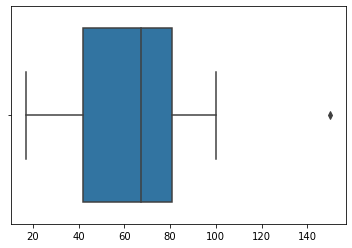

In [29]:
sns.boxplot(salary, orient='x')
plt.show()

**2) В первом ящике находится 8 мячей, из которых 5 - белые. Во втором ящике - 12 мячей, из которых 5 белых. Из первого ящика вытаскивают случайным образом два мяча, из второго - 4. Какова вероятность того, что 3 мяча белые?**

$$P_{3 white} = P_{2 from 1 box 1 from 2 box} + P_{1 from 1 box 2 from 2 box} + P_{3 from 2 box} = 0.369$$

$$P_{2 from 1 box 1 from 2 box} = \frac{C_5^2}{C_{8}^2}*\frac{C_5^1*C_7^3}{C_{12}^4} = 0.126$$

In [30]:
a = combinations(5, 2) / combinations(8, 2) * (combinations(5, 1) * combinations(7, 3)) / combinations(12, 4)
print(a)

0.12626262626262627


$$P_{1 from 1 box 2 from 2 box} = \frac{C_5^1*C_3^1}{C_{8}^2}*\frac{C_5^2*C_7^2}{C_{12}^4} = 0.227$$

In [31]:
b = (combinations(5, 1) * combinations(3, 1)) / combinations(8, 2) * (combinations(5, 2) * combinations(7, 2)) / combinations(12, 4)
print(b)

0.22727272727272727


$$P_{3 from 2 box} = \frac{C_3^2}{C_{8}^2}*\frac{C_5^3*C_7^1}{C_{12}^4} = 0.015$$

In [33]:
c = combinations(3, 2) / combinations(8, 2) * (combinations(5, 3) * combinations(7, 1)) / combinations(12, 4)
print(c)

0.015151515151515152


In [34]:
print(a + b + c)

0.3686868686868687


**3) В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a). на факультете A б). на факультете B в). на факультете C?**

$$P(B\:|\:A) = \frac{P(B) \cdot P(A\:|\:B)}{P(A)}$$

In [39]:
P_A = (1/4 * 0.8) + (1/4 * 0.7) + (1/2 * 0.9)
P_A

0.825

$$P(B_1\:|\:A) = \frac{\frac{1}{4} \cdot 0.8}{\frac{1}{4} \cdot 0.8 + \frac{1}{4} \cdot 0.7 + \frac{1}{2} \cdot 0.9} = 0.242$$

In [40]:
P_B1 = (1/4 * 0.8) / P_A
P_B1

0.24242424242424246

$$P(B_2\:|\:A) = \frac{\frac{1}{4} \cdot 0.7}{\frac{1}{4} \cdot 0.8 + \frac{1}{4} \cdot 0.7 + \frac{1}{2} \cdot 0.9} = 0.212$$

In [41]:
P_B2 = (1/4 * 0.7) / P_A
P_B2

0.21212121212121213

$$P(B_3\:|\:A) = \frac{\frac{1}{2} \cdot 0.9}{\frac{1}{4} \cdot 0.8 + \frac{1}{4} \cdot 0.7 + \frac{1}{2} \cdot 0.9} = 0.545$$

In [42]:
P_B3 = (1/2 * 0.9) / P_A
P_B3

0.5454545454545455

**4) Устройство состоит из трех деталей. Для первой детали вероятность выйти из строя в первый месяц равна 0.1, для второй - 0.2, для третьей - 0.25. Какова вероятность того, что в первый месяц выйдут из строя: а). все детали б). только две детали в). хотя бы одна деталь г). от одной до двух деталей?**

In [44]:
P_A = 0.1 * 0.2 * 0.25
P_A

0.005000000000000001

In [46]:
P_B = (0.1 * 0.2 * (1 - 0.25)) + (0.1 * (1 - 0.2) * 0.25) + ((1 - 0.1) * 0.2 * 0.25)
P_B

0.08000000000000002

In [47]:
P_C = 1- ((1 - 0.1) * (1 - 0.2) * (1 - 0.25))
P_C

0.45999999999999996

In [48]:
P_D = P_B + (0.1 * (1 - 0.2) * (1 - 0.25)) + ((1 - 0.1) * (1 - 0.2) * 0.25) + ((1 - 0.1) * 0.2 * (1 - 0.25))
P_D

0.45500000000000007